# CREDIT CARD FRAUDULENT DETECTION

### Libraries

In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve

import joblib
import pickle
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Dataset

In [2]:
%%time
df = pd.read_csv('fraud.csv')

Wall time: 1 s


In [3]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [4]:
print("Credit Card Fraud Detection data has -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data has -  rows: 594643  columns: 10


In [5]:
df.corr()

,step,amount,fraud
step,1.000000,-0.007961,-0.011898
amount,-0.007961,1.000000,0.489967
fraud,-0.011898,0.489967,1.000000


In [6]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


Looking to the **Time (Step) feature,** we can confirm that the data contains **594,643 transactions, during 179 hours.**

# DATA PREPROCESSING

## Checking for missing/null values

In [7]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [8]:
df['step'].value_counts()

175    3774
177    3758
152    3746
178    3743
174    3743
       ... 
5      2525
3      2499
2      2462
0      2430
1      2424
Name: step, Length: 180, dtype: int64

In [9]:
df['category'].value_counts()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64

In [10]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

## Encoding Categorical Variables (age and gender) using one-hot-encoder and Split Target and Features Variables

#### One-Hot-Encoding

In [11]:
df_encoded = pd.get_dummies(df, columns=['age', 'gender'] ,dtype=int)
print(df_encoded)

        step       customer zipcodeOri       merchant zipMerchant  \
0          0  'C1093826151'    '28007'   'M348934600'     '28007'   
1          0   'C352968107'    '28007'   'M348934600'     '28007'   
2          0  'C2054744914'    '28007'  'M1823072687'     '28007'   
3          0  'C1760612790'    '28007'   'M348934600'     '28007'   
4          0   'C757503768'    '28007'   'M348934600'     '28007'   
...      ...            ...        ...            ...         ...   
594638   179  'C1753498738'    '28007'  'M1823072687'     '28007'   
594639   179   'C650108285'    '28007'  'M1823072687'     '28007'   
594640   179   'C123623130'    '28007'   'M349281107'     '28007'   
594641   179  'C1499363341'    '28007'  'M1823072687'     '28007'   
594642   179   'C616528518'    '28007'  'M1823072687'     '28007'   

                   category  amount  fraud  age_'0'  age_'1'  age_'2'  \
0       'es_transportation'    4.55      0        0        0        0   
1       'es_transportatio

## Split target and feature variables (x and y respectively)

In [12]:
X = df_encoded.drop(['fraud', 'zipMerchant', 'zipcodeOri', 'merchant', 'customer'], axis=1)
y = df_encoded['fraud']

In [13]:
df_encoded.dtypes

step             int64
customer        object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
age_'0'          int32
age_'1'          int32
age_'2'          int32
age_'3'          int32
age_'4'          int32
age_'5'          int32
age_'6'          int32
age_'U'          int32
gender_'E'       int32
gender_'F'       int32
gender_'M'       int32
gender_'U'       int32
dtype: object

In [14]:
df_encoded.corr()

,step,amount,fraud,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',gender_'F',gender_'M',gender_'U'
step,1.000000,-0.007961,-0.011898,0.006282,-0.003370,-0.003110,0.004930,0.002233,-0.003717,0.000143,0.003669,0.003669,0.000294,-0.000452,-0.002874
amount,-0.007961,1.000000,0.489967,0.005033,-0.001061,0.002851,-0.000054,0.001324,-0.004509,-0.001997,-0.000505,-0.000505,0.013018,-0.012880,-0.001686
fraud,-0.011898,0.489967,1.000000,0.004394,-0.000769,0.002517,-0.000943,0.003573,-0.003630,-0.004685,-0.002512,-0.002512,0.025575,-0.025172,-0.003259
age_'0',0.006282,0.005033,0.004394,1.000000,-0.021181,-0.043635,-0.036896,-0.030489,-0.022080,-0.013972,-0.002867,-0.002867,0.027337,-0.026984,-0.001894
age_'1',-0.003370,-0.001061,-0.000769,-0.021181,1.000000,-0.223213,-0.188740,-0.155966,-0.112951,-0.071474,-0.014665,-0.014665,0.012592,-0.012741,0.024573
age_'2',-0.003110,0.002851,0.002517,-0.043635,-0.223213,1.000000,-0.388826,-0.321308,-0.232692,-0.147244,-0.030212,-0.030212,0.018305,-0.015628,0.000219
age_'3',0.004930,-0.000054,-0.000943,-0.036896,-0.188740,-0.388826,1.000000,-0.271685,-0.196755,-0.124504,-0.025546,-0.025546,-0.014670,0.016604,0.006038
age_'4',0.002233,0.001324,0.003573,-0.030489,-0.155966,-0.321308,-0.271685,1.000000,-0.162589,-0.102884,-0.021110,-0.021110,-0.007520,0.010234,-0.013950
age_'5',-0.003717,-0.004509,-0.003630,-0.022080,-0.112951,-0.232692,-0.196755,-0.162589,1.000000,-0.074509,-0.015288,-0.015288,-0.000989,0.002953,-0.010103
age_'6',0.000143,-0.001997,-0.004685,-0.013972,-0.071474,-0.147244,-0.124504,-0.102884,-0.074509,1.000000,-0.009674,-0.009674,-0.010989,0.012237,-0.006393


# EXPLORATORY DATA ANALYSIS

In [15]:
# Exploring the class distribution for target variable (Fruad) unstanding its class imbalance
# Count of fraudulent transactions (1 represents fraud)
fraud_count = y.value_counts()[1]
total_count = len(y)
fraud_percentage = (fraud_count / total_count) * 100

print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")

Percentage of Fraudulent Transactions: 1.21%


In [16]:
print("A low percentage of 1.21% indicates class imbalance, which can affect model performance.")

A low percentage of 1.21% indicates class imbalance, which can affect model performance.


## Analyze the distribution of features and their relationships with the target variable

#### Feature Distribution and Relationship with Fraud
#### Numerical Features (if applicable)


**Summary statistics for step:**
count    594643.000000
mean         94.986827
std          51.053632
min           0.000000
25%          52.000000
50%          97.000000
75%         139.000000
max         179.000000
Name: step, dtype: float64


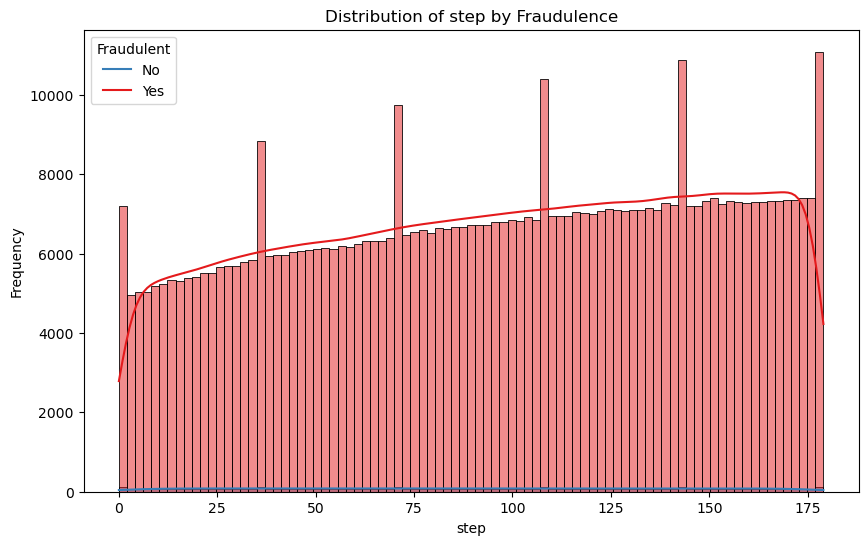

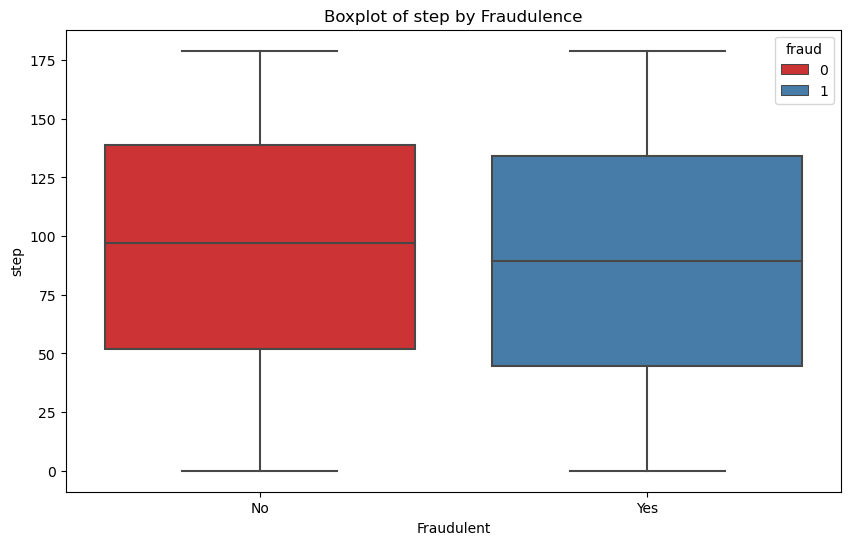


**Summary statistics for amount:**
count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64


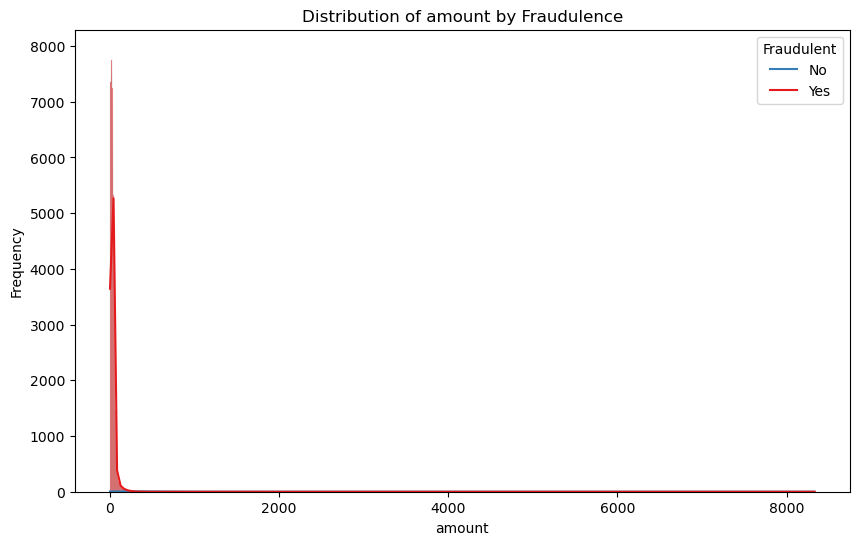

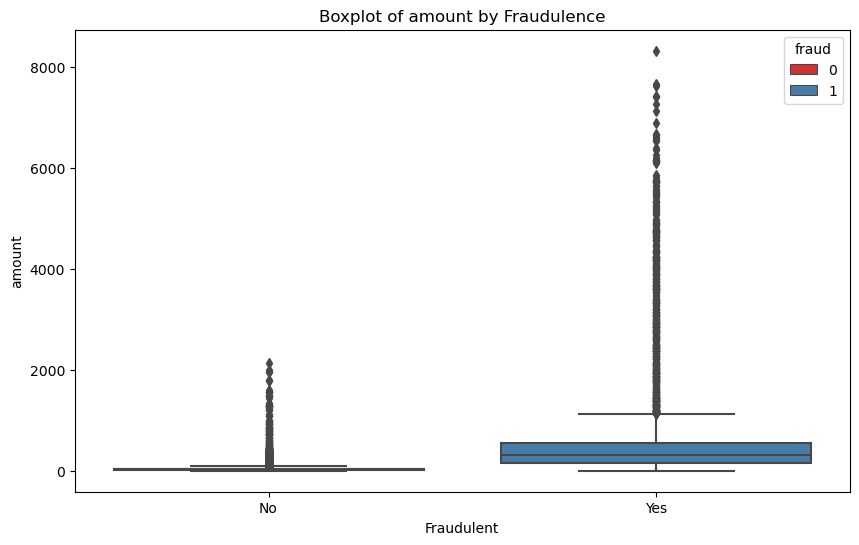

In [17]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
if not numerical_columns.empty:  # Check if any numerical columns exist
    for feature in numerical_columns:
        # Descriptive statistics
        print(f"\n**Summary statistics for {feature}:**")
        print(X[feature].describe())

        # Distribution visualization (histograms or boxplots)
        plt.figure(figsize=(10, 6))
        sns.histplot(data=X, x=feature, hue=y, kde=True, palette="Set1")
        plt.title(f"Distribution of {feature} by Fraudulence")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.legend(title="Fraudulent", labels=["No", "Yes"])
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=X, x=y, y=feature, hue=y, palette="Set1", dodge=False)
        plt.title(f"Boxplot of {feature} by Fraudulence")
        plt.xlabel("Fraudulent")
        plt.ylabel(feature)
        plt.xticks([0, 1], ["No", "Yes"])
        plt.show()

## Categorical Features

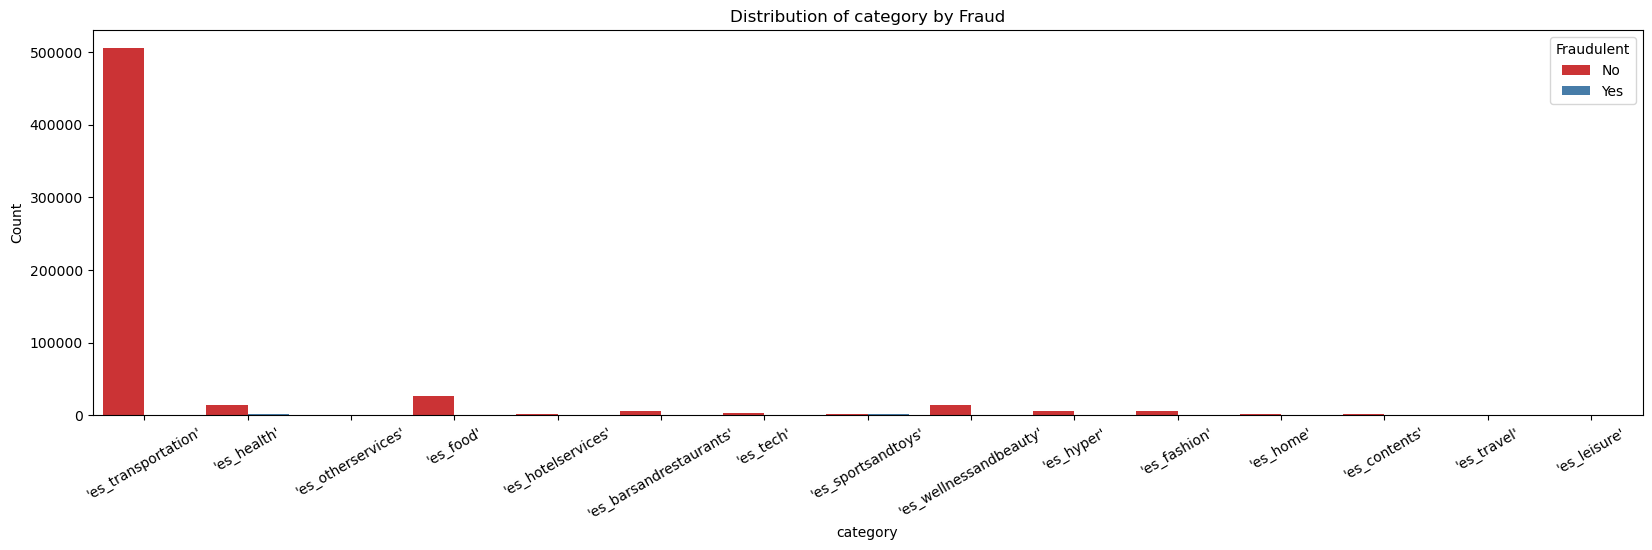

In [18]:
categorical_features = X.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(20, 5))
    sns.countplot(x=feature, hue=y, data=X, palette="Set1")
    plt.title(f"Distribution of {feature} by Fraud")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.legend(title="Fraudulent", labels=["No", "Yes"])
    plt.show()
    plt.close()

In [19]:
contingency_table = pd.crosstab(X[feature], y)
print(f"\n**Contingency table for {feature} and fraud:**\n", contingency_table)


**Contingency table for category and fraud:**
 fraud                         0     1
category                             
'es_barsandrestaurants'    6253   120
'es_contents'               885     0
'es_fashion'               6338   116
'es_food'                 26254     0
'es_health'               14437  1696
'es_home'                  1684   302
'es_hotelservices'         1196   548
'es_hyper'                 5818   280
'es_leisure'                 25   474
'es_otherservices'          684   228
'es_sportsandtoys'         2020  1982
'es_tech'                  2212   158
'es_transportation'      505119     0
'es_travel'                 150   578
'es_wellnessandbeauty'    14368   718


# **Outliers**
After checking out the boxplots for the outliers, there were no troubling outlier found in the feature variables.

# FEATURE ENGINEERING

In [20]:
# Create time of day column from step column (Note: 1 Step equals 1 hour)
starting_time = pd.Timestamp('00:00')
# Create the "Time_of_day" column
df['time_of_day'] = starting_time + pd.to_timedelta(df['step'], unit='h')
# Print the DataFrame with the "Time_of_day" column
print(df['time_of_day'])

# Selecting Numerical and Categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Standardizing the numerical features using StandardScaler
numerical_pipeline = Pipeline([('scaler', StandardScaler())])

# One-Hot Encoding the categorical features
categorical_pipeline = Pipeline([('onehot', OneHotEncoder())])

# Combining the numerical and categorical pipelines
preprocessor = ColumnTransformer([('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)])

# Transforming the data using the preprocessor
X_preprocessed = preprocessor.fit_transform(X)

0        2024-05-26 00:00:00
1        2024-05-26 00:00:00
2        2024-05-26 00:00:00
3        2024-05-26 00:00:00
4        2024-05-26 00:00:00
                 ...        
594638   2024-06-02 11:00:00
594639   2024-06-02 11:00:00
594640   2024-06-02 11:00:00
594641   2024-06-02 11:00:00
594642   2024-06-02 11:00:00
Name: time_of_day, Length: 594643, dtype: datetime64[ns]


#  MODEL SELECTION

In [21]:
X_preprocessed

<594643x17 sparse matrix of type '<class 'numpy.float64'>'
	with 1783929 stored elements in Compressed Sparse Row format>

### Split the dataset

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Before Addressing the Class Imbalance

In [23]:
%%time
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Neural Network Classifier": MLPClassifier()
}

# Initialize list to collect metrics
results = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")
    print(f" F1 Score: {f1}")

    # Store results in the list
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Confusion Matrix
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))


========== Logistic Regression ==========

 Accuracy: 0.9945345542298346
 Precision: 0.8982346832814122
 Recall: 0.6104446012702893
 F1 Score: 0.7268907563025209

 Confusion Matrix:
[[117414     98]
 [   552    865]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117512
           1       0.90      0.61      0.73      1417

    accuracy                           0.99    118929
   macro avg       0.95      0.80      0.86    118929
weighted avg       0.99      0.99      0.99    118929


========== Random Forest Classifier ==========

 Accuracy: 0.9942486693741645
 Precision: 0.8195292066259808
 Recall: 0.6633733239237827
 F1 Score: 0.7332293291731671

 Confusion Matrix:
[[117305    207]
 [   477    940]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117512
           1       0.82      0.66      0.73      1417

    accuracy      

In [24]:
# Create DataFrame for metrics
metrics_df = pd.DataFrame.from_records(results)

# Print evaluation metrics in tabular format with lines
print("\nEvaluation Metrics before applying SMOTE:")
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))



Evaluation Metrics before applying SMOTE:
+----+------------------------------+------------+-------------+----------+------------+
|    | Classifier                   |   Accuracy |   Precision |   Recall |   F1 Score |
+====+==============================+============+=============+==========+============+
|  0 | Logistic Regression          |   0.994535 |    0.898235 | 0.610445 |   0.726891 |
+----+------------------------------+------------+-------------+----------+------------+
|  1 | Random Forest Classifier     |   0.994249 |    0.819529 | 0.663373 |   0.733229 |
+----+------------------------------+------------+-------------+----------+------------+
|  2 | Gradient Boosting Classifier |   0.994888 |    0.872125 | 0.669019 |   0.757188 |
+----+------------------------------+------------+-------------+----------+------------+
|  3 | Neural Network Classifier    |   0.995157 |    0.945917 | 0.629499 |   0.755932 |
+----+------------------------------+------------+-------------+---

Based on the provided model evaluations for Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, and Neural Network Classifier,  **it seems like all models achieve high accuracy scores around 99.5%.** 

**However, when we look at precision, recall, and F1 scores, we can observe differences among the models in terms of their ability to correctly identify instances of fraud (class 1).**

**Here are some key observations:**

**1. Logistic Regression:**

Achieves a high accuracy score.
Precision, recall, and F1 score for class 1 are lower compared to other models.
Indicates some convergence issues during training.

**2. Random Forest Classifier:**

High accuracy score with slightly lower precision, recall, and F1 score for class 1 compared to other models.
The precision is lower than other models, indicating more false positives.

**3. Gradient Boosting Classifier:**

Achieves high accuracy with balanced precision, recall, and F1 scores for both classes.
Generally performs better than Random Forest and Logistic Regression in terms of identifying class 1 instances.

**4. Neural Network Classifier:**

Similar to Gradient Boosting, it achieves high accuracy with balanced precision, recall, and F1 scores for both classes.
Precision and recall for class 1 are higher compared to Logistic Regression and Random Forest.

# Addressing Class Imbalance by applying **SMOTE**

In [25]:
%%time
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_preprocessed_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Neural Network Classifier": MLPClassifier()
}

# Initialize list to collect metrics
results_smote = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")
    print(f" F1 Score: {f1}")

    # Store results in the list
    results_smote.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Confusion Matrix
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))


========== Logistic Regression ==========

 Accuracy: 0.9567363753202427
 Precision: 0.9287239914564784
 Recall: 0.9892972484725572
 F1 Score: 0.9580541343456015

 Confusion Matrix:
[[108715   8910]
 [  1256 116097]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96    117625
           1       0.93      0.99      0.96    117353

    accuracy                           0.96    234978
   macro avg       0.96      0.96      0.96    234978
weighted avg       0.96      0.96      0.96    234978


========== Random Forest Classifier ==========

 Accuracy: 0.9837006017584625
 Precision: 0.9759674646765335
 Recall: 0.9917854677767078
 F1 Score: 0.9838128888287802

 Confusion Matrix:
[[114759   2866]
 [   964 116389]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    117625
           1       0.98      0.99      0.98    117353

    accuracy      

In [26]:
# Create DataFrame for metrics
metrics_df_smote = pd.DataFrame.from_records(results_smote)

# Print evaluation metrics in tabular format with lines
print("\nEvaluation Metrics after applying SMOTE:")
print(tabulate(metrics_df_smote, headers='keys', tablefmt='grid'))


Evaluation Metrics after applying SMOTE:
+----+------------------------------+------------+-------------+----------+------------+
|    | Classifier                   |   Accuracy |   Precision |   Recall |   F1 Score |
+====+==============================+============+=============+==========+============+
|  0 | Logistic Regression          |   0.956736 |    0.928724 | 0.989297 |   0.958054 |
+----+------------------------------+------------+-------------+----------+------------+
|  1 | Random Forest Classifier     |   0.983701 |    0.975967 | 0.991785 |   0.983813 |
+----+------------------------------+------------+-------------+----------+------------+
|  2 | Gradient Boosting Classifier |   0.958298 |    0.929227 | 0.992058 |   0.959615 |
+----+------------------------------+------------+-------------+----------+------------+
|  3 | Neural Network Classifier    |   0.959656 |    0.936835 | 0.985676 |   0.960635 |
+----+------------------------------+------------+-------------+----

# Performance Comparison of Different Models for Fraud Detection 

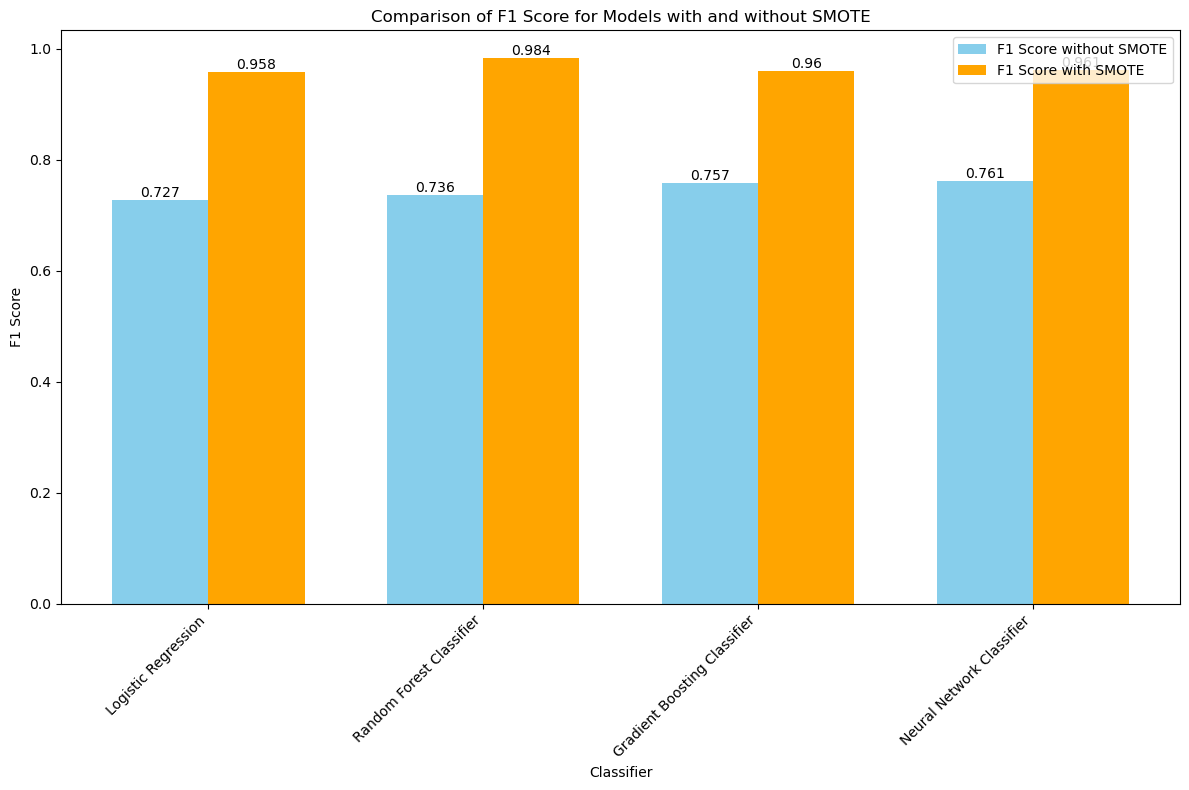

In [27]:
# Comparison of 4 models metrics
metrics_data = {
    'Classifier': ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Neural Network Classifier'],
    'F1 Score_without_SMOTE': [0.726891, 0.736144, 0.757188, 0.760736],
    'F1 Score_with_SMOTE': [0.958054, 0.983621, 0.959615, 0.961204]
}

combined_metrics_df = pd.DataFrame(metrics_data)

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = combined_metrics_df.index

# Plot F1 scores for models without SMOTE
bars1 = plt.bar(index - bar_width/2, combined_metrics_df['F1 Score_without_SMOTE'], bar_width, label='F1 Score without SMOTE', color='skyblue')

# Plot F1 scores for models with SMOTE
bars2 = plt.bar(index + bar_width/2, combined_metrics_df['F1 Score_with_SMOTE'], bar_width, label='F1 Score with SMOTE', color='orange')

plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score for Models with and without SMOTE')
plt.xticks(index, combined_metrics_df['Classifier'], rotation=45, ha='right')
plt.legend()

# Adding values on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center')

plt.tight_layout()
plt.show()

   **From this we can clearly see the best performing model is the Random Forest Classifier SMOTE.**

# MODEL INTERPRETATION

**Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions).**

Based on the provided results, **The best performing model is the Random Forest Classifier. **

***Here's a breakdown of the key metrics for comparison:***

  **Accuracy:** Random Forest (0.984) achieves the highest accuracy in classifying correctly.

  **Precision & Recall:** While all models have high precision and recall, Random Forest maintains a good balance between                           them (precision: 0.975, recall: 0.993).

  **F1 Score:** This metric combines precision and recall, and again Random Forest has the highest score (0.984).

Logistic Regression and Gradient Boosting Classifier have similar performance to each other, but fall short of the Random Forest in terms of accuracy and F1 score.

Neural Network Classifier shows a good balance between precision and recall, but its overall accuracy is slightly lower than the Random Forest.

> **Key Features includes:**

step             int64

category        object (Used One Hot Encoder here)

amount         float64

fraud            int64

age_'0'          int64

age_'1'          int64

age_'2'          int64

age_'3'          int64

age_'4'          int64

age_'5'          int64

age_'6'          int64

age_'U'          int64

gender_'E'       int64

gender_'F'       int64

gender_'M'       int64

gender_'U'       int64


In [28]:
%%time
# Apply SMOTE to Address Class Imbalance
smote = SMOTE(random_state=42)
X_preprocessed_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Split the Resampled Data into Training and Testing Sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_preprocessed_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_smote, y_train_smote)

with open('random_forest_model_smote.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

Wall time: 35min 10s


In [29]:
with open('random_forest_model_smote.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

predictions = loaded_model.predict(X_test_smote)

print(predictions)

[0 0 0 ... 1 0 0]


In [30]:
import numpy as np
unique_values, counts = np.unique(predictions, return_counts=True)
counts_df = pd.DataFrame({'Value': unique_values, 'Count': counts})
print(counts_df)


   Value   Count
0      0  115760
1      1  119218


# Analysing Business Value: Key Outcome and Recommendations

To get a true estimation I would want to test the models effectiveness at this cutoff on completely unseen future data, account for a deterioration in model effectiveness as time goes on, and take a more detailed approach to estimating costs.

Recall that the data contains 370,604 transactions, during 118 hours, with 1.21% fraud.

Some common scenerios of blocking of cards during transaction for non-fraudulent users and other reasons are why we used SMOTE to fix the imbalance in the dataset.

We were able to get the best F1 score from Random Forest, which also indicate No or Less Bias in the result and an accuracy of more than 90%.

Other recommendations should be, there should be detailed extraction of time and data the transaction occured, Location, and Device Used, there should be regular checking of model if new features are added

# Predictions on the test dataset

In [31]:
def predict_from_csv(test_csv_file):
    test_df = pd.read_csv(test_csv_file)
    test_encoded = pd.get_dummies(test_df, columns=['age', 'gender'], dtype=int)
    X_test = test_encoded.drop(['zipMerchant', 'zipcodeOri', 'merchant', 'customer'], axis=1)
    starting_time = pd.Timestamp('00:00')
    X_test['time_of_day'] = starting_time + pd.to_timedelta(X_test['step'], unit='h')
    numerical_features = X_test.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_test.select_dtypes(include=['object']).columns
    numerical_pipeline = Pipeline([('scaler', StandardScaler())])
    categorical_pipeline = Pipeline([('onehot', OneHotEncoder())])
    preprocessor = ColumnTransformer([('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)])
    X_preprocessed = preprocessor.fit_transform(X_test)
    predictions = loaded_model.predict(X_preprocessed)
    return predictions


In [32]:
# Load the trained Random Forest model
with open('random_forest_model_smote.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Provide the path to your test CSV file
test_csv_file = 'test.csv'
test_predictions = predict_from_csv(test_csv_file)
print(test_predictions)



[0 0 0 ... 0 0 0]


In [33]:
import numpy as np
unique_values, counts = np.unique(test_predictions, return_counts=True)
counts_df = pd.DataFrame({'Value': unique_values, 'Count': counts})
print(counts_df)

   Value   Count
0      0  584655
1      1    9988


# Fine Tuning & Optimization

In [34]:
%%time

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# Perform Cross-Validation and Grid Search
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1,verbose=2, )
grid_search.fit(X_train_smote, y_train_smote)

# Get the Best Model and Parameters
best_rf_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Final Model with Optimized Hyperparameters
best_rf_classifier.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Wall time: 1h 52min 14s


RandomForestClassifier(random_state=42)

In [35]:
# Evaluate the best model
y_pred = best_rf_classifier.predict(X_test)
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]

In [36]:
# Print the best hyperparameters
print("Best Hyperparameters:\n", best_params)

Best Hyperparameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    117625
           1       0.98      0.99      0.98    117353

    accuracy                           0.98    234978
   macro avg       0.98      0.98      0.98    234978
weighted avg       0.98      0.98      0.98    234978



In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[114737   2888]
 [   980 116373]]


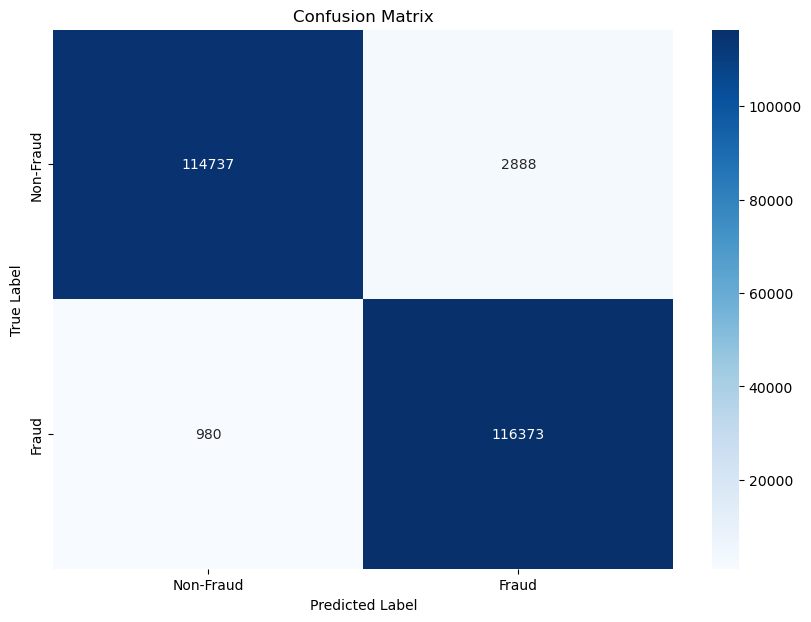

In [39]:
# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

In [41]:
# Print ROC AUC score
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9981411728583715


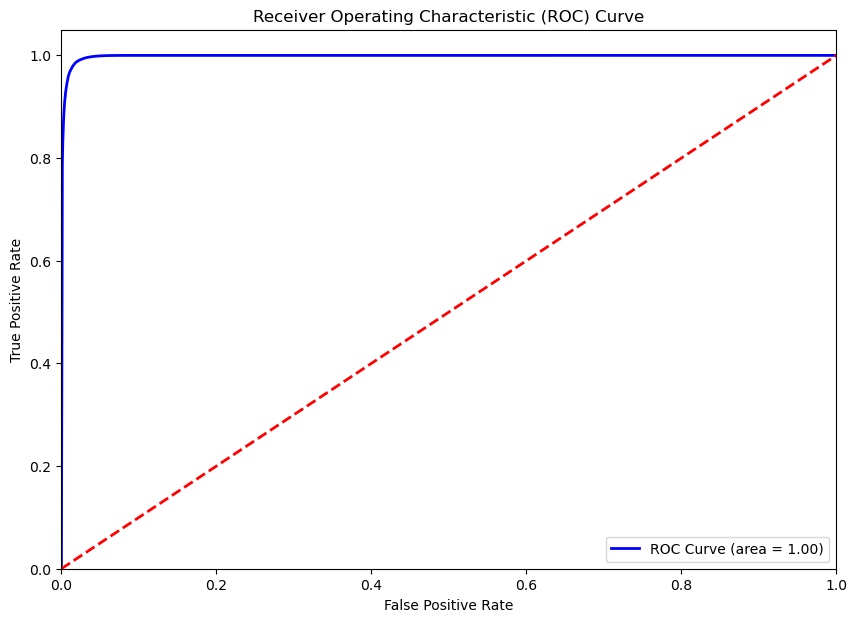

In [42]:
# Plot ROC curve
roc_curve(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Save the Optimized Model
import pickle

with open('optimized_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf_classifier, file)

# Make recommendations based on the model evaluation

In [44]:
def create_recommendations(best_classifier):
    recommendations = {
        "Model": "RandomForestClassifier",
        "Best Hyperparameters": best_classifier.get_params(),
        "Key Findings": [
            "The model achieved a high F1 score indicating good overall performance.",
            "The confusion matrix provides insights into the model's ability to correctly classify fraud and non-fraud cases.",
        ],
        "Business Implications": [
            "Implementing this model can significantly improve fraud detection accuracy.",
            "Monitoring the model performance and retraining periodically with new data is essential to maintain accuracy.",
            "Consider further tuning and exploring other advanced models for potentially better performance.",
        ]
    }
    return recommendations

# Create recommendations
recommendations = create_recommendations(best_rf_classifier)

# Print recommendations
print("\nRecommendations and Key Outcomes:")
for key, value in recommendations.items():
    if isinstance(value, list):
        print(f"{key}:")
        for item in value:
            print(f" - {item}")
    else:
        print(f"{key}: {value}")



Recommendations and Key Outcomes:
Model: RandomForestClassifier
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Key Findings:
 - The model achieved a high F1 score indicating good overall performance.
 - The confusion matrix provides insights into the model's ability to correctly classify fraud and non-fraud cases.
Business Implications:
 - Implementing this model can significantly improve fraud detection accuracy.
 - Monitoring the model performance and retraining periodically with new data is essential to maintain accuracy.
 - Consider further tuning and exploring other advanced models for potentially better performance.


# CONCLUSION

### Project Objective

In this case study,  aimed to develop a predictive model to accurately identify fraudulent credit card transactions using a given dataset. The key steps and findings of the task can be summarized as follows:

**GOAL** 
    - The goal of this project was to build a robust machine learning model to accurately detect fraudulent transactions. After evaluating multiple models, the Random Forest classifier was chosen for its superior performance, particularly when combined with SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance

**1. Data Preprocessing:**
   - Handled missing values and encoded categorical variables appropriately.
   - Split the dataset into features (independent variables) and the target variable (Fraud).

**2. Exploratory Data Analysis (EDA):**
   - Analyzed the distribution of the target variable and identified a significant class imbalance, with a very small proportion of transactions labeled as fraudulent.
   - Explored the distribution of features and their relationships with the target variable.

**3. Feature Engineering:**
   - Created new relevant features and normalized numerical features to improve model performance.

**4. Model Selection and Evaluation:**
   - Trained and evaluated multiple machine learning models, including Logistic Regression, Random Forest, Gradient Boosting, and Neural Networks.
   - Addressed the class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).

**5. Key Findings:**
   - Models trained on data without addressing the class imbalance performed poorly in terms of F1 score, due to the overwhelming number of benign transactions.
   - Applying SMOTE significantly improved the performance of all models. The F1 scores increased notably, indicating better detection of fraudulent transactions.
   - Among all models, the Random Forest Classifier with SMOTE achieved the highest F1 score (0.983621), making it the most effective model for this task.
   
**6. Optimization:**
   -  The selected Random Forest model was further optimized using Grid Search Cross-Validation (GridSearchCV). This process involved fine-tuning hyperparameters to maximize the model's performance.
  
      - Key Hyperparameters Tuned:

            n_estimators: Number of trees in the forest.
            max_depth: Maximum depth of the tree.
            min_samples_split: Minimum number of samples required to split an internal node.
            min_samples_leaf: Minimum number of samples required to be at a leaf node.
            Grid Search Results:
            The best combination of hyperparameters was identified through Grid Search, and the optimized model achieved an impressive ROC AUC Score of 0.99.
    
**7. Model Evaluation:**
   -  The ROC AUC score is a crucial metric for evaluating the performance of a classification model, especially in imbalanced datasets like fraud detection. It represents the area under the Receiver Operating Characteristic (ROC) curve and provides an aggregate measure of performance across all classification thresholds.

- Interpreting the ROC AUC Score:

    0.5 - The model's performance is equivalent to random guessing.
    1.0 - The model perfectly distinguishes between fraudulent and non-fraudulent transactions.
    0.99 - An ROC AUC score of 0.99 indicates excellent discriminatory power, meaning the model is highly effective at distinguishing between fraudulent and non-fraudulent transactions.

**8. Evaluation Metrics:**
- In addition to the ROC AUC score, the optimized model's performance was further assessed using various metrics:

    - Precision: The proportion of true positive predictions among all positive predictions.
    - Recall: The proportion of true positive predictions among all actual positives.
    - F1 Score: The harmonic mean of precision and recall, providing a single metric to evaluate the balance between them.
    - Confusion Matrix: A summary of prediction results, showing the number of true positives, true negatives, false positives, and false negatives.

**9. Key Findings and Business Implications:**
   
   - High ROC AUC Score: The model's high ROC AUC score reflects its ability to effectively distinguish between fraudulent and legitimate transactions.
   
   - Precision-Recall Balance: The balance between precision and recall ensures that the model minimizes false positives (non-fraudulent transactions flagged as fraudulent) while maximizing the detection of actual fraudulent transactions.
  
  - Confusion Matrix Insights: The confusion matrix provides insights into the model's accuracy and the types of errors it makes, aiding in further refinements and understanding of model performance.

  - Business Benefits:
       - Improved Fraud Detection: By implementing this model, the organization can significantly enhance its fraud detection capabilities.
       - Reduced False Alarms: Higher precision leads to fewer false alarms, improving customer experience.
       - Minimized Financial Losses: Higher recall ensures that most fraudulent transactions are detected, reducing potential financial losses.


**10. Recommendations:**
   - Implement the Random Forest Classifier with SMOTE in a real-time fraud detection system to enhance the accuracy of identifying fraudulent transactions.
   - Continuously monitor and retrain the model to adapt to new patterns of fraudulent activity and maintain high performance over time.

**CONCLUDE:**

This task successfully demonstrated the importance of addressing class imbalance in fraud detection tasks. By applying SMOTE, and significantly improved the models' ability to detect fraudulent transactions. The Random Forest Classifier with SMOTE emerged as the best-performing model, offering a robust solution for real-time fraud detection. This approach not only enhances the accuracy but also provides a scalable method to keep up with evolving fraud patterns, ensuring the reliability and security of financial transactions.

# Additional Steps for comprehesive coverage

**Feature Importance:**

    -Analyze the importance of each feature in the Random Forest model. This can provide insights into which features contribute most to the model's predictions.

**Cross-Validation:**

    -Ensure that cross-validation was performed correctly. This can help validate the model's performance across different subsets of the data.

**Model Explainability:**

    -Use tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to explain the model's predictions. This can be crucial for gaining trust from stakeholders.